Mounted at /content/drive


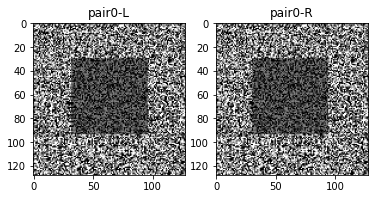

In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.signal import correlate2d
import math
from google.colab import files


from google.colab import drive
drive.mount('/content/drive', force_remount=True)

## 1-a
# Read images
L = cv2.imread('/content/drive/My Drive/computer vision/assignments/assignment4/input/pair0-L.png', 0) * (1.0 / 255.0)  # grayscale, [0, 1]
R = cv2.imread('/content/drive/My Drive/computer vision/assignments/assignment4/input/pair0-R.png', 0) * (1.0 / 255.0)



fig, ax = plt.subplots(1, 2)
ax[0].set_title('pair0-L')
ax[0].imshow(L, cmap='gray')
ax[1].set_title('pair0-R')
ax[1].imshow(R, cmap='gray');

In [ ]:
def disparity_ssd(L, R):

  """Compute disparity map D(y, x) such that: L(y, x) = R(y, x + D(y, x))
    
    Params:
    L: Grayscale left image
    R: Grayscale right image, same size as L

    Returns: Disparity map, same size as L, R
    """

  # the size of the window we compare
  window = 11
  max_offset = 100

  # left image and right image should have the same shape
  assert(L.shape == R.shape)

  #choose L/R arbitrary since they have the same shape
  hight, width = L.shape

  min = math.floor(window/2)
  max_w = width - math.floor(window/2)
  max_h = hight - math.floor(window/2)
  

  # initial
  res = np.zeros((hight, width))
  for x in range(min, max_w):
    for y in range(min, max_h):
      w1 = L[y - min : y + min, x - min : x + min]
      dis = float('inf')
      for i in range(max_offset):
        w2 = R[y - min : y + min, x - min - i : x + min - i]
        if w2.shape == w1.shape:
          d = np.subtract(w1, w2)
          d = np.power(d, 2)
          best = np.sum(d)
          if best < dis:
            dis = best
            res[y, x] = i
            

  return res

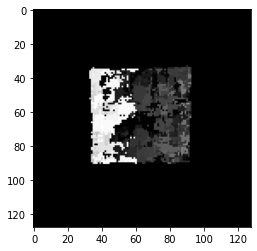

In [ ]:
D_L = disparity_ssd(R, L)

plt.imshow(D_L, cmap='gray')
# plt.savefig('ps2-1-a-1.png')
# files.download("ps2-1-a-1.png") 

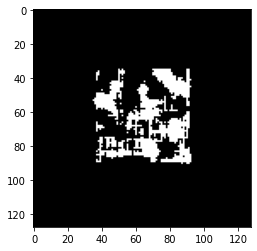

In [ ]:
D_R = disparity_ssd(L, R)

plt.imshow(D_R, cmap='gray')
# plt.savefig('ps2-1-a-2.png')
# files.download("ps2-1-a-2.png") 

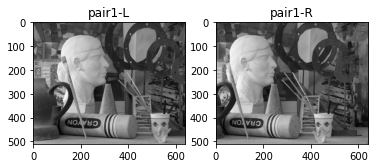

In [ ]:
real_img_L = cv2.imread('/content/drive/My Drive/computer vision/assignments/assignment4/input/pair1-L.png', 0) * (1.0 / 255.0) 
real_img_R = cv2.imread('/content/drive/My Drive/computer vision/assignments/assignment4/input/pair1-R.png', 0) * (1.0 / 255.0)


fig, ax = plt.subplots(1, 2)
ax[0].set_title('pair1-L')
ax[0].imshow(real_img_L, cmap='gray')
ax[1].set_title('pair1-R')
ax[1].imshow(real_img_R, cmap='gray');

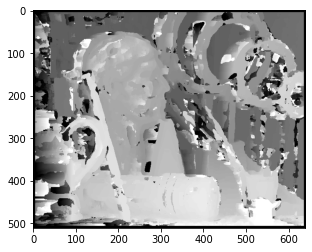

In [ ]:
D_real_L = disparity_ssd(real_img_L, real_img_R)

plt.imshow(D_real_L, cmap='gray')
# plt.savefig('ps2-2-a-1.png')
# files.download("ps2-2-a-1.png") 

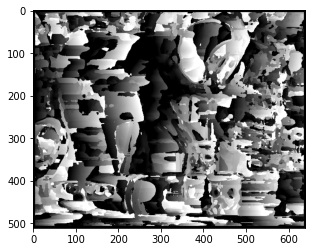

In [ ]:
D_real_R = disparity_ssd(real_img_R, real_img_L)

plt.imshow(D_real_R, cmap='gray')
# plt.savefig('ps2-2-a-2.png')
# files.download("ps2-2-a-2.png") 

In [ ]:
def disparity_ncorr(L, R):

  """Compute disparity map D(y, x) such that: L(y, x) = R(y, x + D(y, x))
    
    Params:
    L: Grayscale left image
    R: Grayscale right image, same size as L

    Returns: Disparity map, same size as L, R
    """

  window = 11
  max_offset = 100
  L = L.astype(np.float32)
  R = R.astype(np.float32)

  assert(L.shape == R.shape)

  # Initial
  min = math.floor(window/2)
  hight, width = L.shape
  max_w = width - math.floor(window/2)
  max_h = hight - math.floor(window/2)


  res = np.zeros((hight, width, max_offset+1), np.float)
  for y in range(min, max_h):
    for x in range(min, max_w):
      fac = x - min - max_offset
      if fac < 0:
        w1 = L[y - min : y + min + 1, x - min : x + min + 1]
        w2 = R[y - min : y + min + 1, : x + min + 1]
        res[y, x, : fac] = np.fliplr(cv2.matchTemplate(w2,w1 , cv2.TM_CCOEFF_NORMED))
      else:
        w1 = L[y - min : y + min + 1, x - min : x + min + 1]
        w2 = R[y - min : y + min + 1, fac : x + min + 1]
        res[y, x, :] = np.fliplr(cv2.matchTemplate(w2, w1, cv2.TM_CCOEFF_NORMED))

  factor = 1.0 / max_offset
  d = res.argmax(-1) * factor
  return d

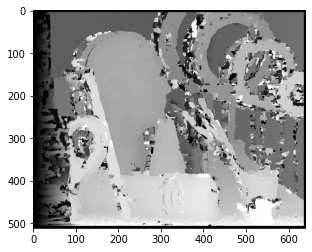

In [ ]:
N_real_L = disparity_ncorr(real_img_L, real_img_R)

plt.imshow(N_real_L, cmap='gray')
# plt.savefig('ps2-4-a-1.png')
# files.download("ps2-4-a-1.png") 

# it seems to work faster with the norm

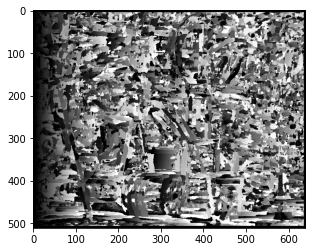

In [ ]:
N_real_R = disparity_ncorr(real_img_R, real_img_L)

plt.imshow(N_real_R, cmap='gray')
# plt.savefig('ps2-4-a-2.png')
# files.download("ps2-4-a-2.png") 

# it seems to work faster with the norm

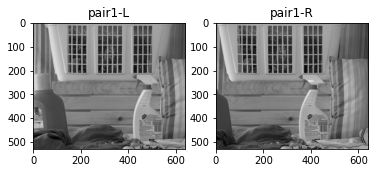

In [ ]:
real_img_L2 = cv2.imread('/content/drive/My Drive/computer vision/assignments/assignment4/input/pair2-L.png', 0) * (1.0 / 255.0) 
real_img_R2 = cv2.imread('/content/drive/My Drive/computer vision/assignments/assignment4/input/pair2-R.png', 0) * (1.0 / 255.0)


fig, ax = plt.subplots(1, 2)
ax[0].set_title('pair1-L')
ax[0].imshow(real_img_L2, cmap='gray')
ax[1].set_title('pair1-R')
ax[1].imshow(real_img_R2, cmap='gray');

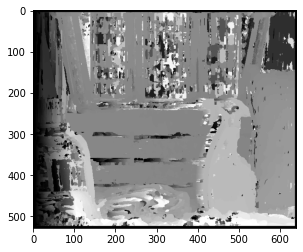

In [ ]:
N_real_L2 = disparity_ncorr(real_img_L2, real_img_R2)

plt.imshow(N_real_L2, cmap='gray')
# plt.savefig('ps2-4-b-1.png')
# files.download("ps2-4-b-1.png") 

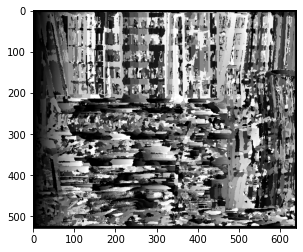

In [ ]:
N_real_R2 = disparity_ncorr(real_img_R2, real_img_L2)

plt.imshow(N_real_R2, cmap='gray')
# plt.savefig('ps2-4-b-2.png')
# files.download("ps2-4-b-2.png") 

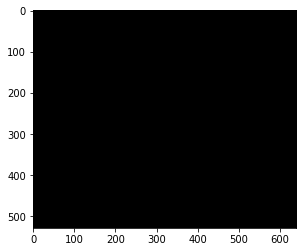

In [ ]:
N_real_L2 = disparity_ncorr(real_img_R2, real_img_R2)

plt.imshow(N_real_L2, cmap='gray')
# plt.savefig('ps2-4-b-2.png')
# files.download("ps2-4-b-2.png") 

# same image for left and right should give us
# 0 at all pixels because it will find
# the exact same window at the other image
# that is why we get black image

#left to right works fine, but from right to left does not work that well, the difference between without norm and with norm is mainly in the runtime, and we get much noisier pictures than the groundtruth.

In [191]:
# I used wikipedia to write this code
def edgeDetectionSobel(image, thresh = 0.7):
  Gx = np.array([[1.0, 0.0, -1.0], [2.0, 0.0, -2.0], [1.0, 0.0, -1.0]])
  Gy = np.array([[1.0, 2.0, 1.0], [0.0, 0.0, 0.0], [-1.0, -2.0, -1.0]])
  mag = np.zeros(image.shape)
  [rows,columns] = np.shape(image)
  output_image = np.zeros(shape=(rows, columns))

  for i in range(rows-2):
    for j in range(columns-2):
      S1 = np.sum(np.multiply(Gx, image[i:i + 3, j:j + 3]))
      S2 = np.sum(np.multiply(Gy, image[i:i + 3, j:j + 3]))
      mag[i+1,j+1] = np.sqrt(S1**2+S2**2)

  max = np.max(mag)
  thresh = thresh*max
  for i in range(1,rows):
    for j in range(1,columns):
      if mag[i,j] < thresh:
        output_image[i,j] = min(255, mag[i,j])

  output_image = output_image.astype(np.uint8)
  return output_image

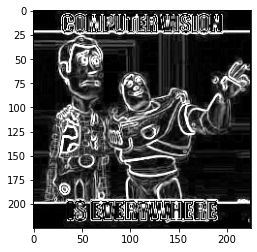

In [202]:
img = cv2.cvtColor(cv2.imread('/content/drive/My Drive/computer vision/assignments/assignment4/input/pic1.png'), cv2.COLOR_BGR2GRAY)
img = edgeDetectionSobel(img)
# img = img.astype(np.float32)
img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
plt.imshow(img)
# plt.savefig('pic1 output sobel.png')
# files.download("pic1 output sobel.png")

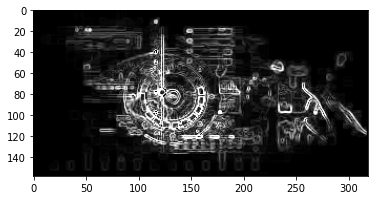

In [195]:
img = cv2.cvtColor(cv2.imread('/content/drive/My Drive/computer vision/assignments/assignment4/input/pic2.png'), cv2.COLOR_BGR2GRAY)
img = edgeDetectionSobel(img)
img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
plt.imshow(img)
# plt.savefig('pic2 output sobel.png')
# files.download("pic2 output sobel.png")

In [ ]:
# I used geeksforgeeks to help me write this code

def edgeDetectionCanny(image,thrs_1,thrs_2):

  height, width = image.shape

  # step 1 - smooth with gaussian
  image = cv2.GaussianBlur(image, (5, 5), 1.4)
       
  # step 2 - compute partial derivatives
  lx = cv2.Sobel(np.float32(image), cv2.CV_64F, 1, 0, 3)
  ly = cv2.Sobel(np.float32(image), cv2.CV_64F, 0, 1, 3)
      
  # step 3 - compute magnitude and direction  
  magnitude, direction = cv2.cartToPolar(lx, ly, angleInDegrees = True)
       
       
  for x in range(width):
    for y in range(height):

      #  step 4 - quantize the gradient directions to 4 sections
      gradient_directions = direction[y, x]
      gradient_directions = abs(gradient_directions - 180) if abs(gradient_directions) > 180 else abs(gradient_directions)
               
      # 0:[0,22.5)U(157.5,180]
      if gradient_directions < 22.5 or 157.5 < gradient_directions <= 180:
        first_neighbor_x, first_neighbor_y = x - 1, y
        second_neighbor_x, second_neighbor_y = x + 1, y
              
      # 45:[22.5,67.5)
      elif 22.5 <= gradient_directions < 67.5:
        first_neighbor_x, first_neighbor_y = x - 1, y - 1
        second_neighbor_x, second_neighbor_y = x + 1, y + 1
              
      # 90:[67.5,112.5)
      elif 67.5 <= gradient_directions < 112.5:
        first_neighbor_x, first_neighbor_y = x, y - 1
        second_neighbor_x, second_neighbor_y = x, y + 1
              
      # 135:[112.5,157.5)
      elif 112.5 <= gradient_directions < 157.5:
        first_neighbor_x, first_neighbor_y = x - 1, y + 1
        second_neighbor_x, second_neighbor_y = x + 1, y - 1
              
               
      # step 5 - preform NMS
      if width > first_neighbor_x >= 0 and height > first_neighbor_y >= 0:
        if magnitude[y, x] < magnitude[first_neighbor_y, first_neighbor_x]:
          magnitude[y, x]= 0
          continue
   
      if width > second_neighbor_x >= 0 and height > second_neighbor_y >= 0:
        if magnitude[y, x] < magnitude[second_neighbor_y, second_neighbor_x]:
          magnitude[y, x]= 0
                

  # step 6.1 - define two threshholds 
  mag_max = np.max(magnitude)
  T2 = mag_max * thrs_2
  T1 = mag_max * thrs_1
       
  # step 6.2
  for x in range(width):
    for y in range(height):
              
      gradient_magnitude = magnitude[y, x]

      # if its smaller than borh than its not edge  
      if gradient_magnitude < T2:
        magnitude[y, x]= 0

      # if its greater than T2 than it is presumed to be an edge
      elif T1 > gradient_magnitude >= T2:
        magnitude[y, x]= 1

      # and if its greater than T1 than its an edge
      elif gradient_magnitude > T1:
        magnitude[y, x]= 2
       
  return magnitude

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


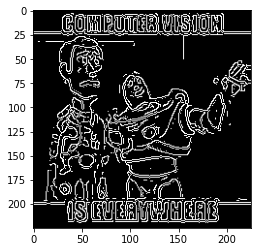

In [ ]:
img = cv2.cvtColor(cv2.imread('/content/drive/My Drive/computer vision/assignments/assignment4/input/pic1.png'), cv2.COLOR_BGR2GRAY)
img = edgeDetectionCanny(img,0.2,0.09)
img = img.astype(np.float32)
img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
plt.imshow(img)
# plt.savefig('pic1 output canny.png')
# files.download("pic1 output canny.png")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


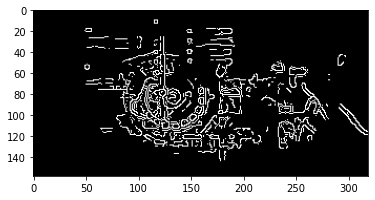

In [ ]:
img = cv2.cvtColor(cv2.imread('/content/drive/My Drive/computer vision/assignments/assignment4/input/pic2.png'), cv2.COLOR_BGR2GRAY)
img = edgeDetectionCanny(img,0.2,0.09)
img = img.astype(np.float32)
img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
plt.imshow(img)
# plt.savefig('pic2 output canny.png')
# files.download("pic2 output canny.png")

#It seems that canny is more detailed, and find more edges than sobel, and it takes only the important edges.